In [4]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


env: OMP_NUM_THREADS=2


In [5]:
# Locate and load the data file
df = pd.read_csv('/Users/mukulsherekar/Documents/Applied_Machine_Learning/master.csv')



**Question: 1**

I think HDI (human development index) would be the most important information to "machine learn". I say this because HDI s a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. 

Suicide rates can be governed by some factors contributing to HDI like education because education means greater chance of jobs, purpose and family and these are anti-thesis of suicide. Standard of living governed by gross national income (GNI) per capita (person) also relates to suicide because poverty can relate to suicide rates. Finally, I am not sure about life expectancy at birth relates to suicide rates.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. These factors can play a role in suicide rates.

In conclusion, HDI is a complex parameter and hence can be machine learned to predict suicide rates.

After some data exploration, sex, age, generation, gdp_per_capita may predict suicide rates irrespecitve of country or year. All these factors are simpler compared to HDI.

Overall, it will be difficult to machine-learn reason of suicides (hence suicide rates) factors that result in suicides are very complex and intertwined with so many other things.

## Question: 2##

It can be both a classification or regression problem. My inclination will be to solve it as a regression problem because the data does not have a label in-built into it. So, it will be better to discover the patterns in data and use those patterns to set up a regression method. 

Classification also can be used but for that modeller will have to label the data. This raises the question of how to label the data. Main question will be to decide on threshold level for suicide rate to deem low or high. Artificial labelling can induce bias.

(comment on unsupervised approach)

## Question: 3 ##

If going the regression route, Suicide per 100k population should the dependent variable because it is the rate of suicide. Since, it is the rate it can be easily predicted as number or it can be converted into labels.

If going the classification route, a new variable (label) called low suicide rate or high suicide rate should be the dependent variable. This has to be introduced in the data to train the data and then predict.

## Question: 5 ##

** DATA PRE-PROCESSING **
My strategy for pre-processing for this particular data-set is as follows:

1) Identify useful features (columns) by data exploration and graphing

2) Use groupby command to combine the data and then analyse by graphing again

3) Take care of missing data, imputing whenever necessary

4) Convert object data type (nominal) into numerical by one hot encoding

5) Rank the features using PCA analysis and ignore lowly ranked features


In [6]:
# checking unique values in columns with nominal dtype ie object
for f in list(df.columns.values):
    if df[f].dtype == object:
        print(df[f].unique()) 

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [7]:
# Unique values for object datatypes columns tell us that not many missing values

In [8]:
#From above, the column country-year seems to be redundant so getting rid of it
del df['country-year']


df.dtypes

In [9]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
gdp_for_year($)        object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [10]:
# Checking for duplicates 
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df)}")
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

#total= 27820
#duplicated= 0


In [11]:
# checking for missing values
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
HDI for year           True
gdp_for_year($)       False
gdp_per_capita ($)    False
generation            False
is_duplicate          False
dtype: bool

So, HDI for year has missing values. The data type of missing values is float so mean can be used to replace.
Missing values will be replaced later.

But question is if mean for HDI makes sense?
What is HDI depends on like what does it mean
Is it even necessary for modelling?

There are no missing nominal values as shown above by absence of missing values in object datatype columns.
Incorrect entries will be checked for later.

In [12]:
# Getting rid of suicides_no and population because suicides/100k captures the 
# information from both columns
del df['suicides_no']

In [13]:
del df['population']

In [14]:
# converting data type of gdp to integer
# first getting rid of commas
df["gdp_for_year($)"] = [float(str(i).replace(",", "")) for i in df["gdp_for_year($)"]]
df['gdp_for_year($)'].astype(str).astype(float)

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name: gdp_for_year($), Length: 27820, dtype: float64

In [15]:
del df['is_duplicate']

In [16]:
# quick check on corelation coef
df.corr()


,year,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($)
year,1.000000,-0.039037,0.366786,0.094529,0.339134
suicides/100k pop,-0.039037,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.074279,1.000000,0.305193,0.771228
gdp_for_year($),0.094529,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.001785,0.771228,0.303405,1.000000


correlation for any pairs is super low so regression might not be a good choice

Exploring data by grouping columns

In [17]:
# Aggregate over country
df2 = df.copy()
df2 = df2.groupby(['country']).mean()
df2 = df2.reset_index()
print(len(df2))

del df2['year']
# Sanity
df2.head()


101


,country,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($)
0,Albania,3.502879,0.673000,5.211661e+09,1859.045455
1,Antigua and Barbuda,0.552901,0.781667,8.035452e+08,10448.185185
2,Argentina,10.469328,0.779600,2.742565e+11,7914.096774
3,Armenia,3.275872,0.690125,5.386592e+09,1873.919463
4,Aruba,9.503095,NaN,2.196223e+09,24221.642857


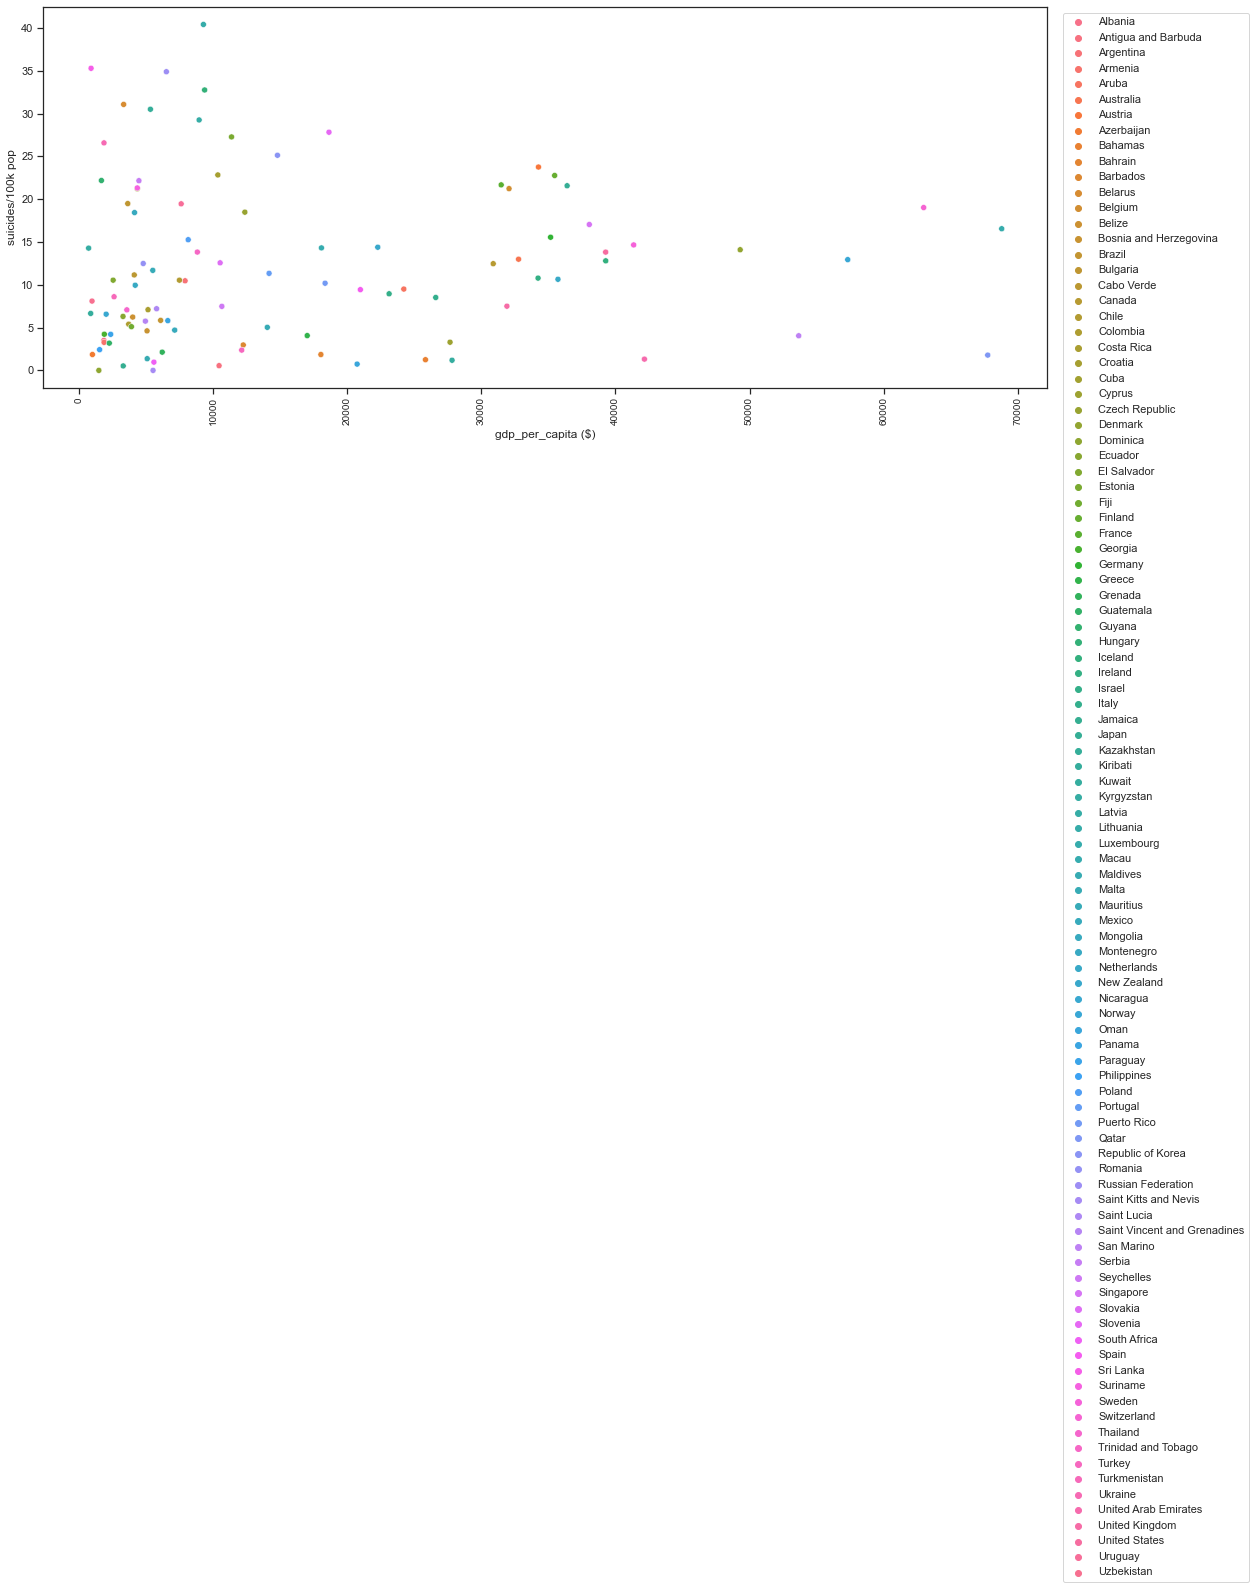

In [18]:
# Plotting

plt.figure(figsize=(18, 7), dpi=72)
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', hue='country', data=df2)
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.01, 1.0));

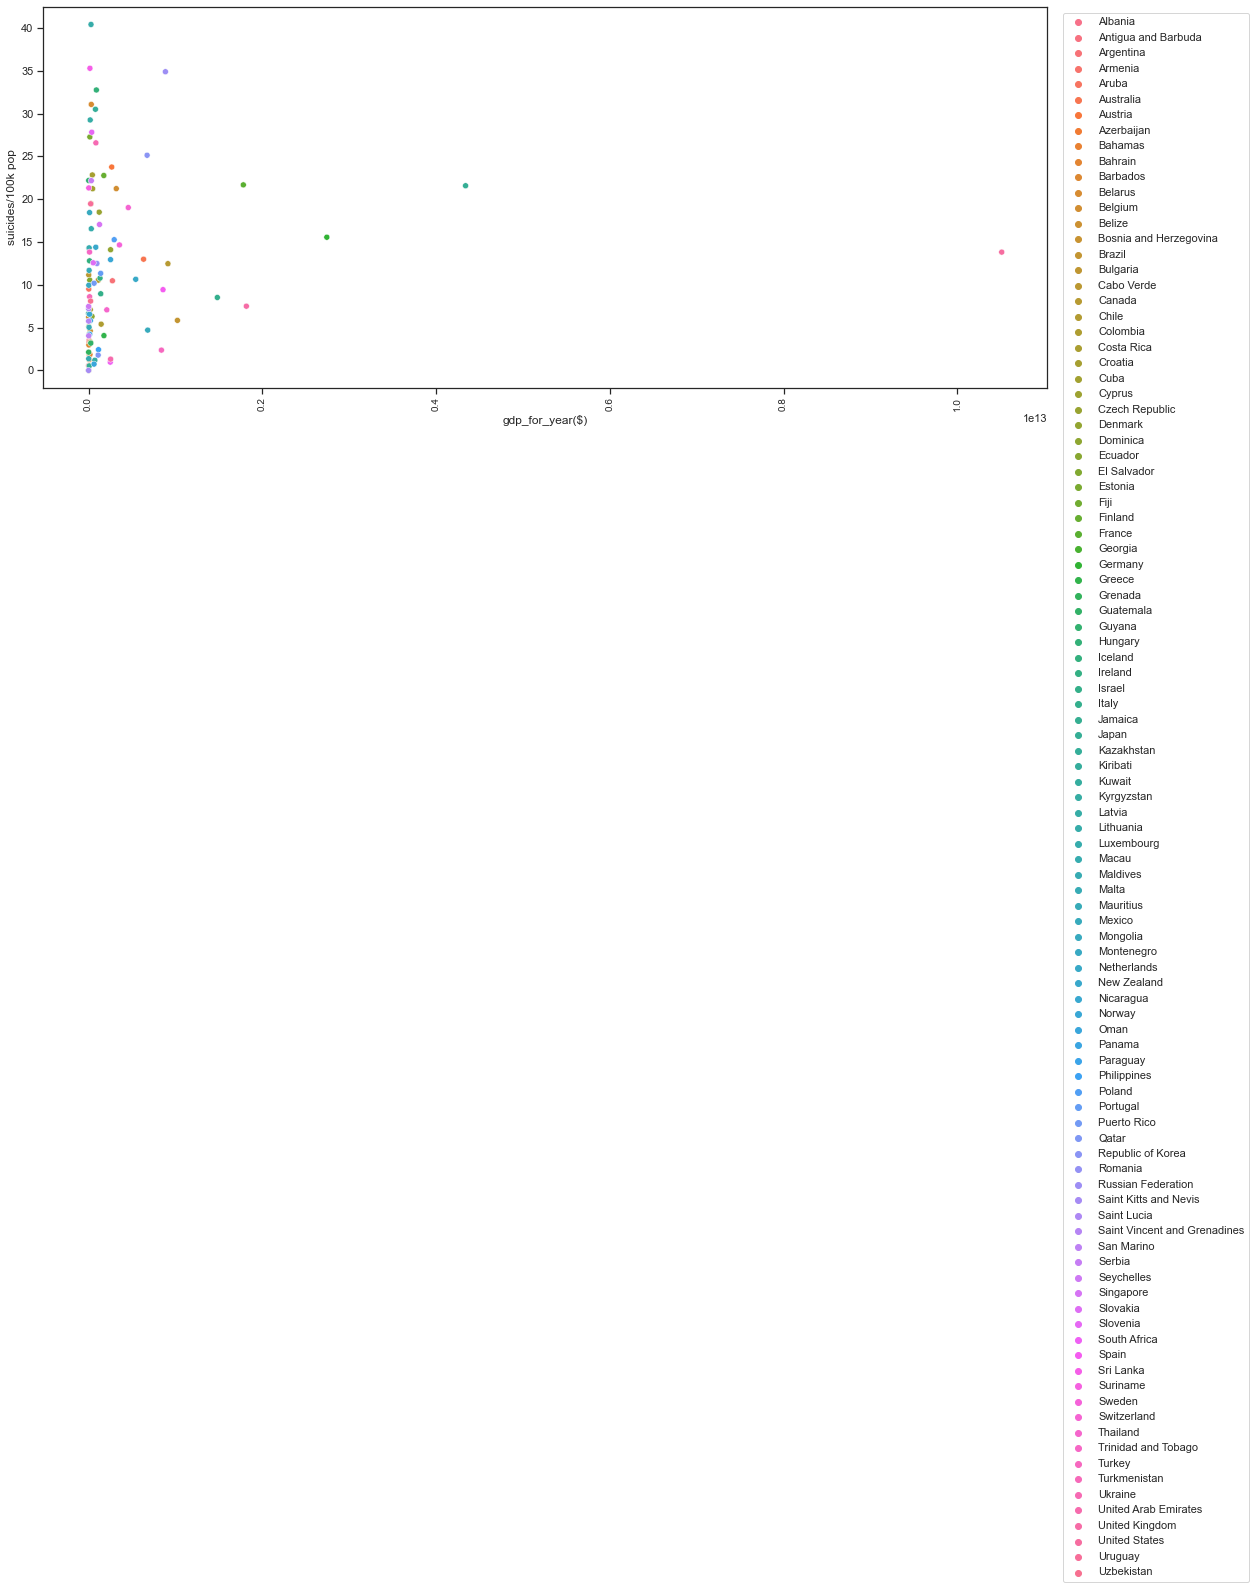

In [19]:
plt.figure(figsize=(18, 7), dpi=72)
sns.scatterplot(x='gdp_for_year($)', y='suicides/100k pop', hue='country', data=df2)
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.01, 1.0));

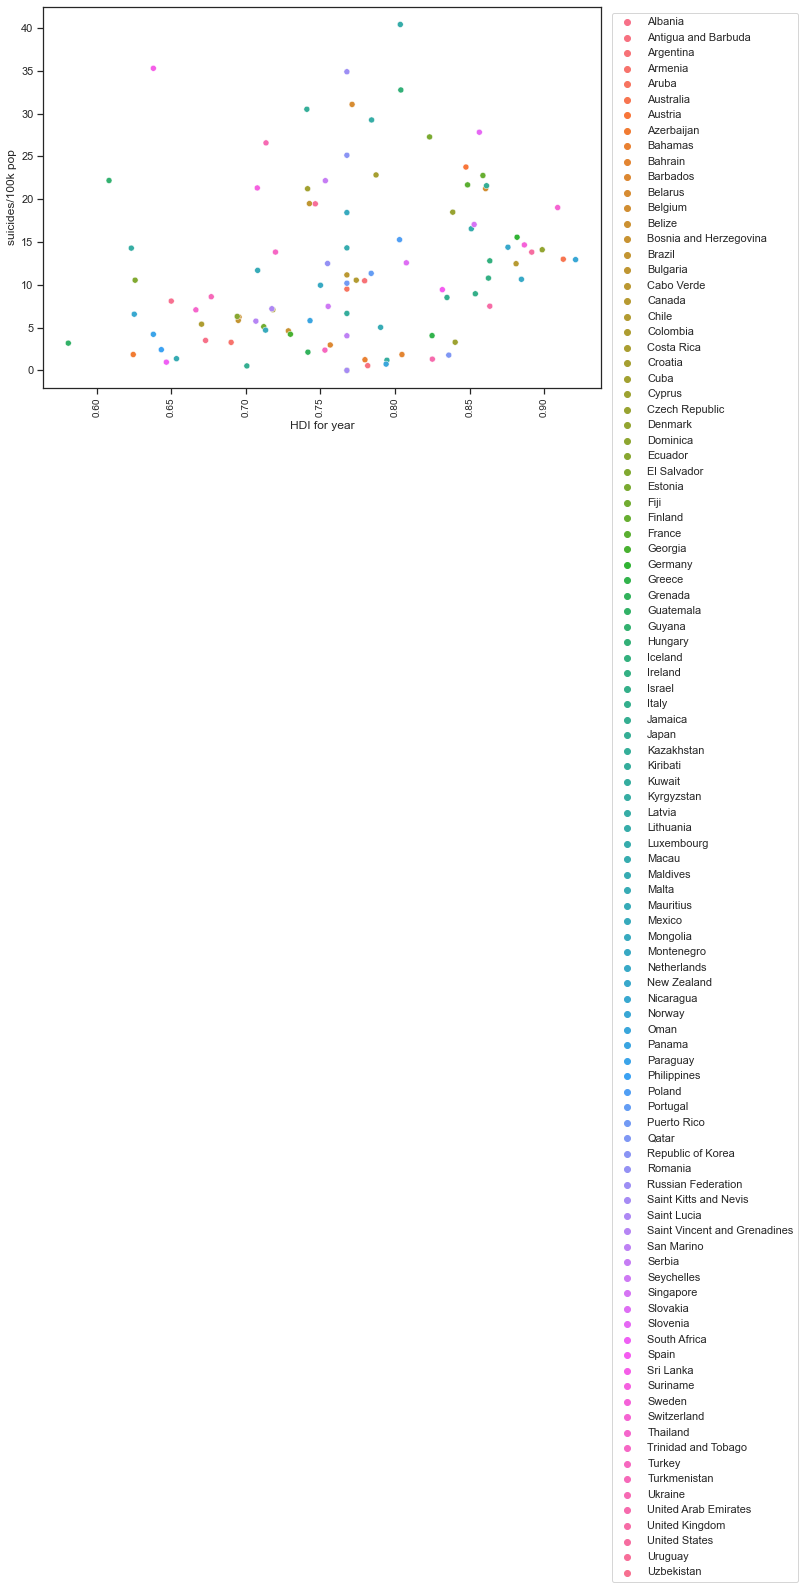

In [20]:
# replacing missing values in HDI with mean
mean_hdi = df2['HDI for year'].mean()

# Impute
df2['HDI for year'] = df2['HDI for year'].fillna(mean_hdi)

# plotting for mean
plt.figure(figsize=(10, 7), dpi=72)
sns.scatterplot(x='HDI for year', y='suicides/100k pop', hue='country', data=df2)
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.01, 1.0));


In [21]:
# Aggregate over sex, year and generation
df3 = df.copy()
df3 = df3.groupby(['sex', 'year', 'generation']).mean()
df3 = df3.reset_index()

# replacing missing values in HDI with mean
mean_hdi = df3['HDI for year'].mean()

# Impute
df3['HDI for year'] = df3['HDI for year'].fillna(mean_hdi)

# Sanity
df3.head()

,sex,year,generation,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($)
0,female,1985,Boomers,4.740208,0.699162,1.926471e+11,6091.229167
1,female,1985,G.I. Generation,9.500208,0.699162,1.926471e+11,6091.229167
2,female,1985,Generation X,2.544479,0.699162,1.926471e+11,6091.229167
3,female,1985,Silent,5.831875,0.699162,1.926471e+11,6091.229167
4,female,1986,Boomers,5.090208,0.771428,2.302251e+11,7126.104167


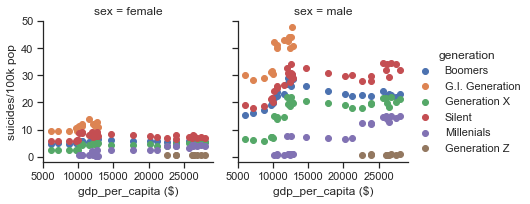

In [22]:
# Plot for data exploration
g = sns.FacetGrid(df3, col='sex', hue='generation')
g.map(plt.scatter, 'gdp_per_capita ($)', 'suicides/100k pop')
g.add_legend();

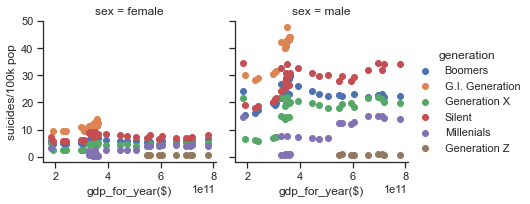

In [23]:
# Plot for data exploration
g = sns.FacetGrid(df3, col='sex', hue='generation')
g.map(plt.scatter, 'gdp_for_year($)', 'suicides/100k pop')
g.add_legend();

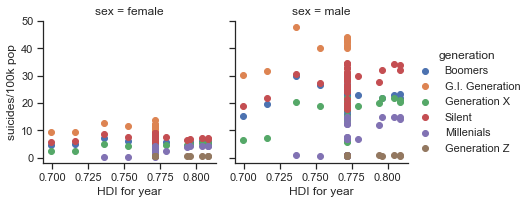

In [24]:
# Plot for data exploration
g = sns.FacetGrid(df3, col='sex', hue='generation')
g.map(plt.scatter, 'HDI for year', 'suicides/100k pop')
g.add_legend();

ONE HOT ENCODING

In [25]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides/100k pop     float64
HDI for year          float64
gdp_for_year($)       float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [26]:
# encoding sex, age, generation and country
df4 = df.copy()
df5 = pd.get_dummies(df4[['sex', 'age', 'generation', 'country']])
df4['suicides/100k pop']

0        6.71
1        5.19
2        4.83
3        4.59
4        3.28
         ... 
27815    2.96
27816    2.58
27817    2.17
27818    1.67
27819    1.46
Name: suicides/100k pop, Length: 27820, dtype: float64

In [27]:
df5.columns

Index(['sex_female', 'sex_male', 'age_15-24 years', 'age_25-34 years',
       'age_35-54 years', 'age_5-14 years', 'age_55-74 years', 'age_75+ years',
       'generation_Boomers', 'generation_G.I. Generation',
       ...
       'country_Thailand', 'country_Trinidad and Tobago', 'country_Turkey',
       'country_Turkmenistan', 'country_Ukraine',
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan'],
      dtype='object', length=115)

PRE-PROCESSING ends and Unsupervised dimensionality reduction via principal component analysis

In [28]:
from sklearn.model_selection import train_test_split
y = df4['suicides/100k pop'].values
X = df5.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# need to be better and elegant here





In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [30]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
len(pca.explained_variance_ratio_)

115

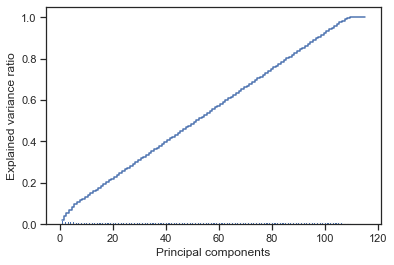

In [31]:
plt.bar(range(1, 116), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 116), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [32]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

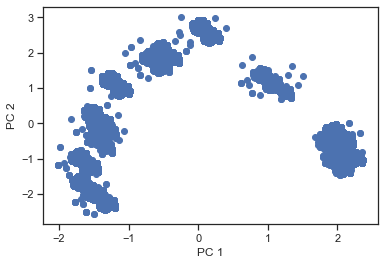

In [33]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

** Question: 4**

**Ranking the variables**

In [34]:
# one way could be correlation
df4.corr()

,year,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($)
year,1.000000,-0.039037,0.366786,0.094529,0.339134
suicides/100k pop,-0.039037,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.074279,1.000000,0.305193,0.771228
gdp_for_year($),0.094529,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.001785,0.771228,0.303405,1.000000


Correlation is not telling anything important because 
coefficenits of suicides/100k pop (dependent variable)
with other varibales are super low.

In [35]:
# another way could be to use eigen vectors and values
pca_all = PCA(n_components=None)
X_train_pc_all = pca_all.fit_transform(X_train_std)
pca_all.explained_variance_ratio_
pca_imp = pca_all.explained_variance_ratio_[0:10]
len(pca_all.explained_variance_ratio_)




115

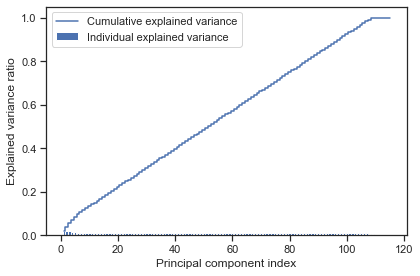

In [36]:
# eigen values and vectors
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt


plt.bar(range(1, 116), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 116), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()


** Assessing feature contributions **

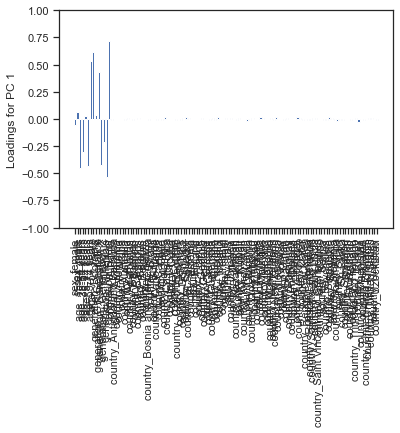

In [37]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()

ax.bar(range(115), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(115))
ax.set_xticklabels(df5.columns[0:115], rotation=90)

plt.ylim([-1, 1])
#plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()






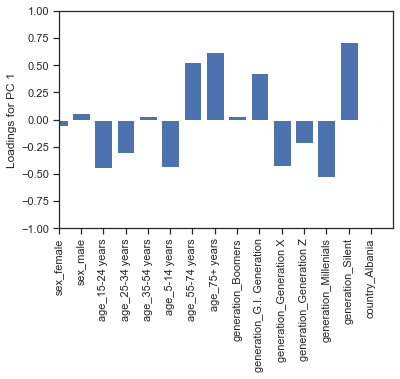

In [38]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()

ax.bar(range(115), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(15))
ax.set_xticklabels(df5.columns[0:15], rotation=90)

plt.ylim([-1, 1])
plt.xlim([0,15])
#plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

As per my analysis, age(55-74), age(75+), GI generation, silent generation show positive coreration with 1st principal axis so one can say these features are more important than others.

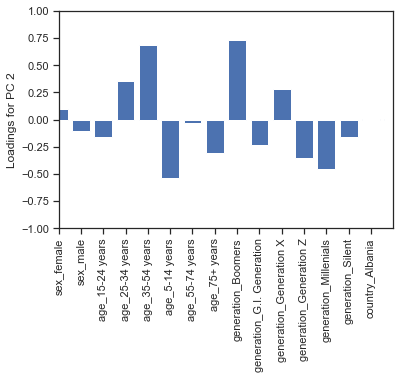

In [39]:
fig, ax = plt.subplots()

ax.bar(range(115), sklearn_loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(15))
ax.set_xticklabels(df5.columns[0:15], rotation=90)

plt.ylim([-1, 1])
plt.xlim([0,15])
#plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

As per my analysis, age(25-34), age(35-54) and Boomer generation show positive coreration with PC-2

** Question: 6**

Classifier

In [ ]:
# Support Vector Regression
# 1st iteration of the model
from sklearn import metrics
from sklearn.svm import SVR


clf_svr = SVR(kernel = 'rbf')
clf_svr.fit(X_train_pca, y_train)

expected = y_test
predicted = clf_svr.predict(X_test_pca)


In [ ]:
corr_matrix = np.corrcoef(expected, predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

# R squared value of 0.23; this means model needs to be improved.